<a href="https://colab.research.google.com/github/loicoyono/onlygit/blob/master/model_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importation des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
# lecture de la base de donnée 
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#voir toute la base de donnée ne pas oublier df
pd.set_option ('display.max_row',df.shape[0]+1)


In [ ]:
# juste afficher 10 lignes 
pd.set_option ('display.max_row',10)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# afficher les valeures manquantes
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
                     ..
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
Length: 13, dtype: int64

In [ ]:
# voir les valeurs mal renseignées voir les valeurs eronnées 
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#afficher les valeurs categoriques 
df.describe(include='O')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002138,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
#renseigner les valeurs manquantes
#pour les categorique on remplace par le maximum pour les numériques on remplace par les similaires, la valeur la plus proche
#premierement on divise les variables en deux, d'une les numeriques de l'autre les categoriques
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
# cat_data est une liste de liste maintenant il faut la transformer en base de donnée 
#et on utilise transpose pour mettre la liste à l'endroit
cat_data=pd.DataFrame(cat_data).transpose()
#on fait la meme chose pour les variables numeriques
num_data=pd.DataFrame(num_data).transpose()


In [ ]:
# Maintenat remplacons les valeurs manquantes
#on commence par les valeurs categoriques et on remplace par les valeurs qui se repetent le plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
#value_counts est une fonction qui renvoie le nombre de repetitions 
#par exemple pour avoir dans le tableau le nombre de personnes mariés on peut faire "cat_data['married'].value_counts()"
cat_data.isnull().sum().any()
#la valeur false sera renvoyée car il n'existe plus de valeures nulles 


False

In [ ]:
#on fait la meme chose pour les variables numerique sauf qu'on remplace les valeurs manquantes par la valeure precedente de la meme collonne
#ici on applique directement sur la base de donnée du coup on ne met pas egale 
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any()

False

In [ ]:
#maintenant on va creer un dictionnaire et remplacer la valeur d'accept de credit y par 1 et n par 0
target_value={'Y':1,'N':0}
#la ligne qui suit l'applique à la base de donnée
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
#on va le faire our les autres collones mais cette fois ci plutot automatiquement et non plus à la main
#le 1 c'est pour les valeurs qui se repetent le plus

le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [ ]:
#on va supprimer Loan Id car il ne sert à rien 
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
#concatener les valeurs numerique et les valeures categoriques dans une seule base de donnée
X=pd.concat([cat_data,num_data],axis=1)
#et on met la reponse dans Y
y=target
X


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


In [ ]:
###################################################################################################################
#Annalyse exploratioire
#pour comprendre la base de donnée en utilisant des visuels 

In [ ]:
#on commence par la variable target pour voir le nombre de credit accepté ou refusés
target.value_counts()


1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
#la base de donnée utilisée pour l'analyse exploratoier EDA
df=pd.concat([cat_data,num_data,target],axis=1)

le pourcentage des credits accordés est : 0.3127035830618892
le pourcentage des credits non accordés est : 0.6872964169381107


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


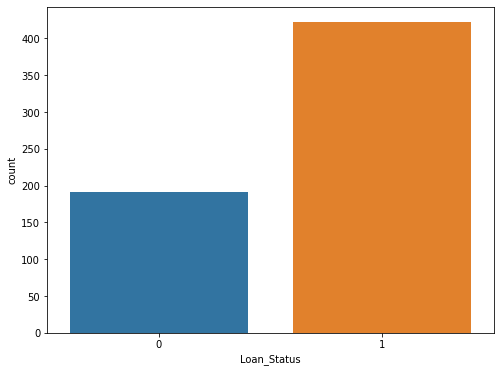

In [ ]:
#Maintenant utilisons la visualisation avec matplotlib
plt.figure(figsize=(8,6))
sns.countplot(target)
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print(f'le pourcentage des credits accordés est : {yes}')
print(f'le pourcentage des credits non accordés est : {no}')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


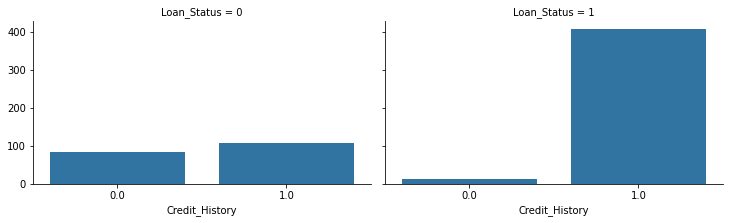

In [ ]:
#############Maintenang on va verifier l'impact du credit dans les variables
#on commence par l'historique des credits

#credit history
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


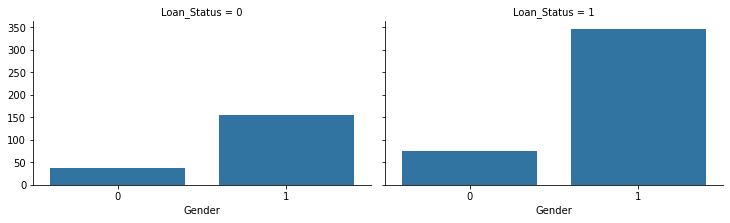

In [ ]:
#sexe
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Gender')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


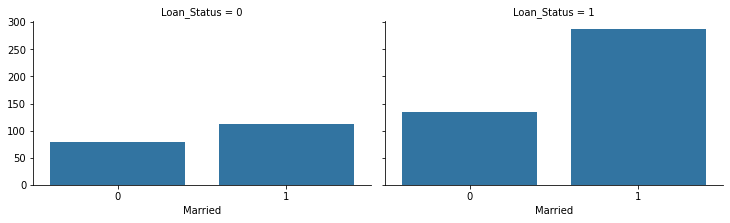

In [ ]:
#marie
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Married')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


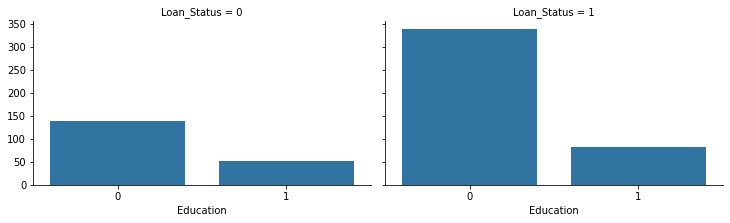

In [ ]:
#etude
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Education')

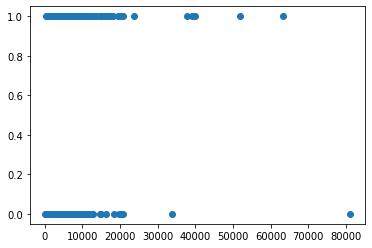

In [ ]:
#salaire
#pour le salaire il faut un autre type vu qu'il s'agit d'une valeur numérique
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

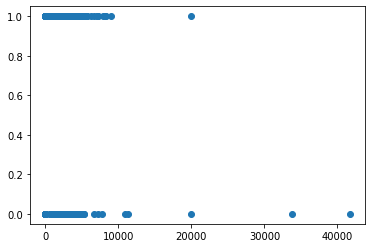

In [ ]:
#revenu du conjoint
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [ ]:
#median au lieu de moyenne pour ne pas sentir l'impact des valeurs aberantes
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1,1,0,0,0,1,3833.5,268.0,132.5,360.0,1.0
1,1,1,0,0,0,1,3812.5,1239.5,127.5,360.0,1.0


In [ ]:
###########################################""
#réalisation du modele 
#Divisier la bas de donnée en Test et entrainement
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X,y):
  X_train,X_test=X.iloc[train],X.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

print('X_train taille: ',X_train.shape)
print('X_test taille: ',X_test.shape)
print('y_train taille: ',y_train.shape)
print('y_test taille: ',y_test.shape)


X_train taille:  (491, 11)
X_test taille:  (123, 11)
y_train taille:  (491,)
y_test taille:  (123,)


In [117]:
#@title
#allons maintenant creer notre model
#on va appliquer 3 algorithmes logistic Regression, KNN, Decision Tree
models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42),
}
#Definir la fonction de précision 
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'la precision du modele est: {acc}')
#la fonction d'application des modeles 
def train_test_eval(models,X_train,y_train,X_test,y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train,y_train)
    accu(y_test,model.predict(X_test))
    print('-'*30)

train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du modele est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision du modele est: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
la precision du modele est: 0.8455284552845529
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [122]:
#par rapport au code precedent pour trouver la reponse de la boucle on doit saisir 11 variable maintenant il va falloir coisir quelques variqbles pour injecter dans l'application
#on réalise une nouvelle base de donnée qu'on nome X_2 et on choisit quelques variables qui ont un impact significatif
X_2=X[['Credit_History','Married','CoapplicantIncome']]

In [123]:
#on définit de nouveau train et test
#Divisier la bas de donnée en Test et entrainement
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X_2,y):
  X_train,X_test=X_2.iloc[train],X_2.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

print('X_train taille: ',X_train.shape)
print('X_test taille: ',X_test.shape)
print('y_train taille: ',y_train.shape)
print('y_test taille: ',y_test.shape)
#on verra dans les resultats qu'on descend à 5 collones au lieu de 11
#on peut meme reduire à 3 en retirant deux variables qu'on juge inutiles


X_train taille:  (491, 3)
X_test taille:  (123, 3)
y_train taille:  (491,)
y_test taille:  (123,)


In [124]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du modele est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision du modele est: 0.6991869918699187
------------------------------
DecisionTreeClassifier :
la precision du modele est: 0.8455284552845529
------------------------------


In [125]:
############################################maintenant la réalisa
#on applique uniquement le modele de la regression logistique
Classifier=LogisticRegression()
Classifier.fit(X_2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
#Enregistrer le model 
pickle.dump(Classifier,open('model.pkl','wb'))